<a href="https://colab.research.google.com/github/MohamedMostafaSal/My-ITI/blob/main/polynomial_regression/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 16.37 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

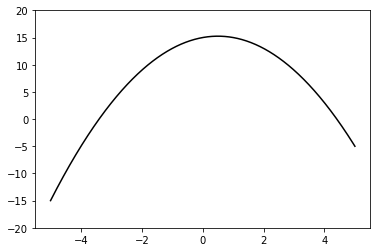

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

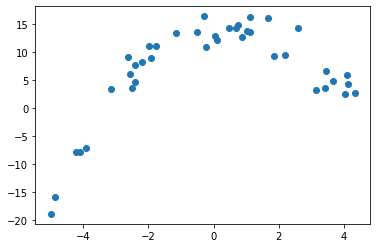

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [23]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree,interaction_only=False, include_bias=False)
    X = X.reshape(-1, 1)
    X = poly.fit_transform(X)
    return X
X_poly=addPoly(X,200)

In [24]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [61]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test =X_train.reshape(-1, 1), X_test.reshape(-1, 1), y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [62]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [67]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize = True).fit(X_train, y_train)
model_no_reg.score(X_train,y_train)
#model_no_reg.score(X_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.9980577592354908

Training error (rmse): 0.3567881692971798
Testing error (rmse): 4012607744.6244097


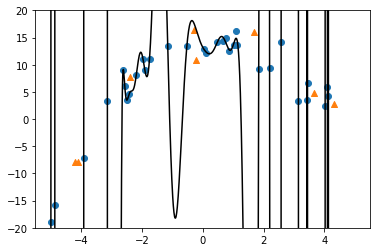

Polynomial coefficients
[13.211416695237151, -10.3074878157032, 22.755133890731628, -18.506058793622064, 9.265920236421874, 413.5975610155903, -550.858521769193, -922.4895387108564, 1162.0937691572865, 963.7382126352123, -1025.2308499584665, -589.4888568874775, 481.0261759455312, 220.99202513918195, -131.56842694611862, -50.67772355772799, 21.62740139961197, 6.864213763445388, -2.0800955560294927, -0.4891468307810222, 0.10018840916864137, 0.010399902944668688, -0.0005457921009492943, 0.0005614346270966191, -0.00011922871408458373, -1.0626854090175323e-05, -4.882751200471901e-07, -1.0078102139539948e-06, 1.4688568339884817e-07, -1.956533726129056e-08, 6.021758254336949e-09, 4.88506450785054e-10, 7.03608745893588e-11, 4.786217273302908e-11, -4.832982378231774e-12, 1.9162511187927574e-12, -3.8785737905879177e-13, 5.118004030923846e-14, -1.7660552437340648e-14, 8.618004824614322e-16, -6.16562220481481e-16, -2.4083734981056254e-19, -1.7146686403060322e-17, -6.971359938147363e-19, -3.3492310

In [68]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1)

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = 

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)